<a href="https://colab.research.google.com/github/aciofo/AI-Engineering/blob/main/machine-learning-fundamentals/classification/classification_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Specifically, you need to create a classification model, capable of recognizing malignant tumors, that:


1.   Has an accuracy on the test set of at least 0.96
2.   Has an AUC on the test set of at least 0.98
3.   Has a recall of 1 (0 false positives)


To evaluate the model, you need to recreate the following visualizations:

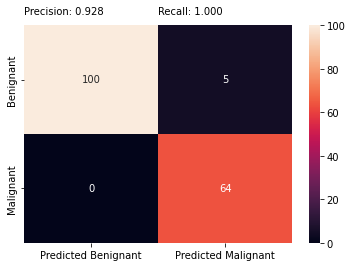

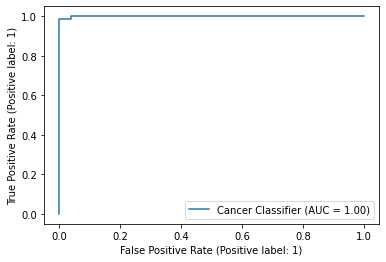


Once done, provide predictions for this data, saving the following information in an excel file:

*   The patient ID
*   The model prediction
*   The probability associated with the predicted class





In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
BASE_URL = 'https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/'

df = pd.read_csv(BASE_URL + 'breast_cancer.csv')
df.head()

,ID number,diagnosis,radius mean,texture mean,perimeter mean,area mean,smoothness mean,compactness mean,concavity mean,concave points mean,...,radius worst,texture worst,perimeter worst,area worst,smoothness worstse,compactness worst,concavity worst,concave points worst,symmetry worst,fractal dimension worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [63]:
df = df.drop("ID number", axis=1)

In [64]:
counts = df["diagnosis"].value_counts()
print(f"Benignant = {counts[0]} ({counts[0]/counts.sum()*100:.2f}%) ")
print(f"Malignant = {counts[1]} ({counts[1]/counts.sum()*100:.2f}%) ")

Benignant = 353 (62.70%) 
Malignant = 210 (37.30%) 


<ipython-input-64-176c70da7141>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Benignant = {counts[0]} ({counts[0]/counts.sum()*100:.2f}%) ")
<ipython-input-64-176c70da7141>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Malignant = {counts[1]} ({counts[1]/counts.sum()*100:.2f}%) ")


In [65]:
map_dict = {"M":1, "B":0}
df["diagnosis"] = df["diagnosis"].map(lambda x: map_dict[x])
df.head()

,diagnosis,radius mean,texture mean,perimeter mean,area mean,smoothness mean,compactness mean,concavity mean,concave points mean,symmetry mean,...,radius worst,texture worst,perimeter worst,area worst,smoothness worstse,compactness worst,concavity worst,concave points worst,symmetry worst,fractal dimension worst
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [66]:
x = df.drop("diagnosis", axis=1).values
y = df["diagnosis"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=0)

In [67]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [68]:
lr = LogisticRegression(class_weight="balanced")
lr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [69]:
y_pred_train = lr.predict(x_train)
y_proba_train = lr.predict_proba(x_train)
y_pred_test = lr.predict(x_test)
y_proba_test = lr.predict_proba(x_test)

In [70]:
print(classification_report(y_test, y_pred_test))
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       105
           1       0.95      0.98      0.97        64

    accuracy                           0.98       169
   macro avg       0.97      0.98      0.97       169
weighted avg       0.98      0.98      0.98       169

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       248
           1       0.98      0.97      0.98       146

    accuracy                           0.98       394
   macro avg       0.98      0.98      0.98       394
weighted avg       0.98      0.98      0.98       394



In [71]:
y_pred_train = np.where(y_proba_train[:,1] > 0.25, 1, 0)
y_pred_test = np.where(y_proba_test[:,1] > 0.25, 1, 0)

In [72]:
print(classification_report(y_test, y_pred_test))
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       105
           1       0.91      1.00      0.96        64

    accuracy                           0.96       169
   macro avg       0.96      0.97      0.96       169
weighted avg       0.97      0.96      0.96       169

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       248
           1       0.92      0.99      0.95       146

    accuracy                           0.96       394
   macro avg       0.96      0.97      0.96       394
weighted avg       0.97      0.96      0.96       394



In [73]:
confusion_matrix(y_train, y_pred_train)

array([[235,  13],
       [  1, 145]])

In [79]:
def plot_confusion_matrix(y_true, y_pred, labels=['Negative', 'Positive'], show_precision_recall=False):

  cm = confusion_matrix(y_true, y_pred)

  df_cm = pd.DataFrame(cm,
                       index = ['Malignant', 'Benignant'],
                       columns = ['Predictive Benignant', 'Predictive Malignant'])

  sns.heatmap(df_cm, annot=True)

  if show_precision_recall:
    plt.text(0, -0.1, f"Precision = {cm[1,1] / (cm[1,1] + cm[0,1]):.3f}")
    plt.text(1, -0.1, f"Recall = {cm[1,1] / (cm[1,1] + cm[1,0]):.2f}")

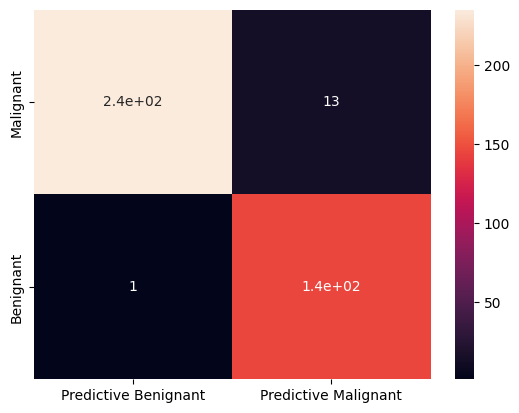

In [80]:
plot_confusion_matrix(y_train, y_pred_train)

In [81]:
def plot_confusion_matrix(y_true, y_pred, labels=['Negative', 'Positive'], show_precision_recall=False):

  cm = confusion_matrix(y_true, y_pred)

  df_cm = pd.DataFrame(cm,
                       index = ['Malignant', 'Benignant'],
                       columns = ['Predictive Benignant', 'Predictive Malignant'])

  sns.heatmap(df_cm, annot=True, fmt='g')

  if show_precision_recall:
    plt.text(0, -0.1, f"Precision = {cm[1,1] / (cm[1,1] + cm[0,1]):.3f}")
    plt.text(1, -0.1, f"Recall = {cm[1,1] / (cm[1,1] + cm[1,0]):.2f}")

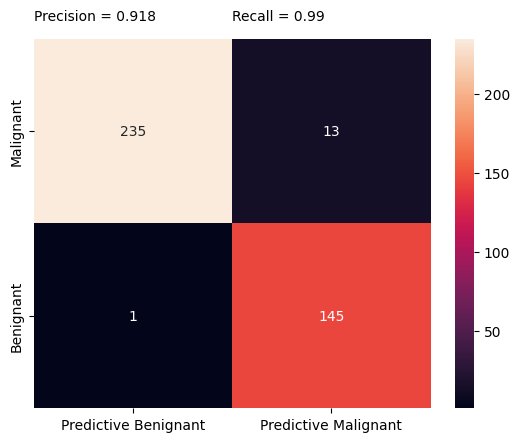

In [84]:
plot_confusion_matrix(y_train, y_pred_train, show_precision_recall=True)

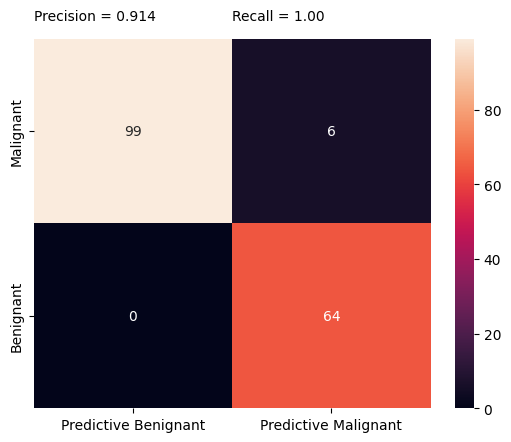

In [85]:
plot_confusion_matrix(y_test, y_pred_test, show_precision_recall=True)

In [86]:
from sklearn.metrics import RocCurveDisplay

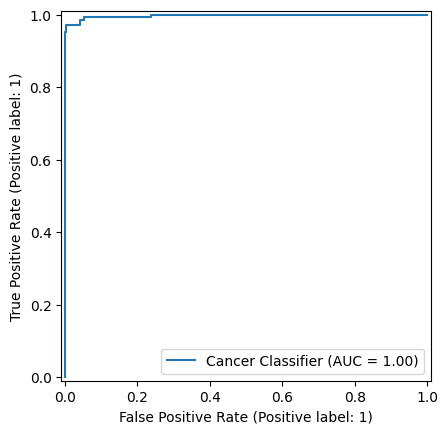

In [88]:
rcd = RocCurveDisplay.from_estimator(lr, x_train, y_train, name="Cancer Classifier")

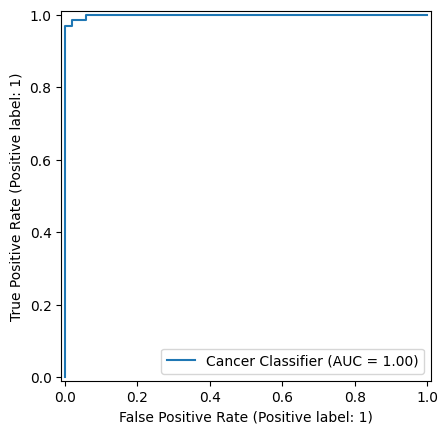

In [89]:
rcd = RocCurveDisplay.from_estimator(lr, x_test, y_test, name="Cancer Classifier")

In [96]:
df_pred = pd.read_csv(BASE_URL + 'breast_cancer_pred.csv')

In [97]:
x = df_pred.drop("ID number", axis=1).values
x = ss.transform(x)

In [98]:
y_proba = lr.predict_proba(x)
y_pred = np.where(y_proba[:,1] > 0.25, 1, 0)

In [99]:
y_pred

array([1, 0, 0, 0, 0])

In [104]:
df_results = pd.DataFrame({"ID number": df_pred["ID number"], "prediction": y_pred, "probability": y_proba.max(axis=1).round(4)})

In [105]:
df_results.head()

,ID number,prediction,probability
0,842302,1,1.0000
1,8510426,0,0.8775
2,8510653,0,0.9952
3,8510824,0,1.0000
4,859487,0,0.9982


In [106]:
df_results.to_excel("breast_cancer_prediction.xlsx", index=False)